# Heart Disease Detection Project
This notebook demonstrates the process of building a machine learning model to detect heart disease.
- Dataset: UCI Heart Disease Dataset
- Goal: Predict presence of heart disease
- Tools: Pandas, Matplotlib, Scikit-learn, Seaborn

In [1]:
import pandas as pd

df = pd.read_csv('dataset.csv') 
print(df.head()) 

   age  sex  chest pain type  resting bp s  cholesterol  fasting blood sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   
2   37    1                2           130          283                    0   
3   48    0                4           138          214                    0   
4   54    1                3           150          195                    0   

   resting ecg  max heart rate  exercise angina  oldpeak  ST slope  target  
0            0             172                0      0.0         1       0  
1            0             156                0      1.0         2       1  
2            1              98                0      0.0         1       0  
3            0             108                1      1.5         2       1  
4            0             122                0      0.0         1       0  


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the dataset
df = pd.read_csv('dataset.csv') 
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [4]:
# Data preprocessing
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# Model training and evaluation
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"\nModel: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))


Model: Logistic Regression
Accuracy: 0.8613445378151261
[[ 90  17]
 [ 16 115]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       107
           1       0.87      0.88      0.87       131

    accuracy                           0.86       238
   macro avg       0.86      0.86      0.86       238
weighted avg       0.86      0.86      0.86       238


Model: Random Forest
Accuracy: 0.9453781512605042
[[ 98   9]
 [  4 127]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       107
           1       0.93      0.97      0.95       131

    accuracy                           0.95       238
   macro avg       0.95      0.94      0.94       238
weighted avg       0.95      0.95      0.95       238



In [6]:
import pandas as pd
df = pd.read_csv("dataset.csv")  
df.head()


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [7]:
# Assuming y_test and y_pred are already available
predictions_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})


In [8]:
import pandas as pd

# Convert predicted values to DataFrame
predictions_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})

# Save to CSV
predictions_df.to_csv('heart_predictions.csv', index=False)

# Show the first 5 rows to confirm
predictions_df.head()


,Actual,Predicted
0,1,1
1,1,1
2,0,0
3,1,1
4,1,1


In [9]:
results = X_test.copy()
results['Actual'] = y_test.values
results['Predicted'] = y_pred

results.to_csv('heart_full_predictions.csv', index=False)
results.head()


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,Actual,Predicted
390,61,1,4,160,0,1,1,145,0,1.0,2,1,1
247,54,1,3,120,237,0,0,150,1,1.5,2,1,1
260,55,0,2,122,320,0,0,155,0,0.0,1,0,0
155,56,1,4,155,342,1,0,150,1,3.0,2,1,1
984,60,0,4,150,258,0,2,157,0,2.6,2,1,1


In [10]:
# Export to CSV
predictions_df.to_csv('heart_predictions.csv', index=False)


In [11]:
predictions_df.head()


,Actual,Predicted
0,1,1
1,1,1
2,0,0
3,1,1
4,1,1


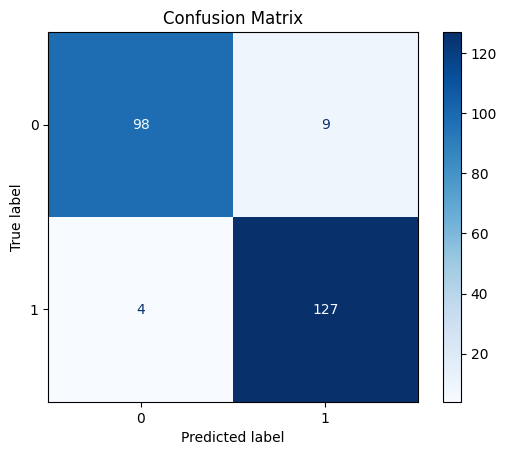

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


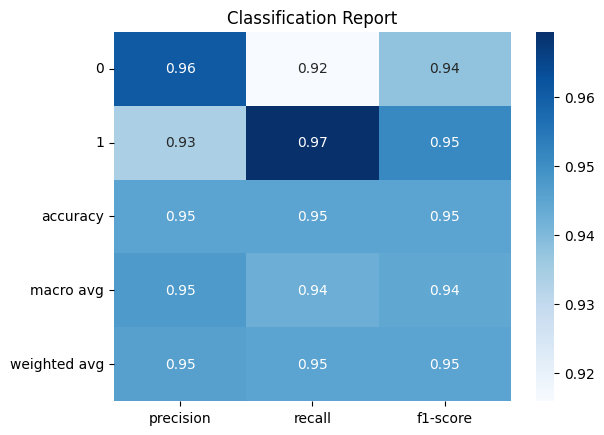

In [13]:
from sklearn.metrics import classification_report
import seaborn as sns
import pandas as pd

report = classification_report(y_test, y_pred, output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='Blues')
plt.title("Classification Report")
plt.show()


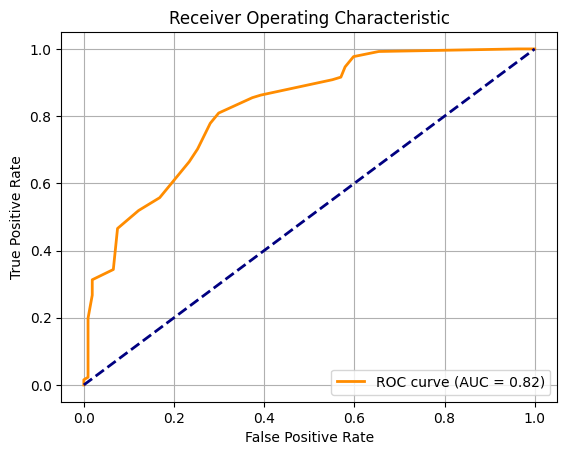

In [14]:
from sklearn.metrics import roc_curve, auc

y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for positive class
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [15]:
predictions = model.predict(X_test)

In [16]:
import pandas as pd

predictions_df = pd.DataFrame({
'Actual': y_test,
'Predicted': predictions
})

In [17]:
predictions_df.to_csv('heart_disease_predictions.csv', index=False)